In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import trompy as tp

%run "..//src//vgp_helper_fx"

In [2]:
DATA_FOLDER = "D:\\TestData\\2photon"

#casein session
animal="VGP302"
day="031"
date="20221110"
s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

events_file = os.path.join(DATA_FOLDER,
                           "behav",
                           "sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv"
                           .format(animal, day, date))

cas = assemble_data(s2p_folder,events_file)

#casein session
animal="VGP302"
day="029"
date="20221108"
s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

events_file = os.path.join(DATA_FOLDER,
                           "behav",
                           "sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv"
                           .format(animal, day, date))

malt = assemble_data(s2p_folder,events_file)

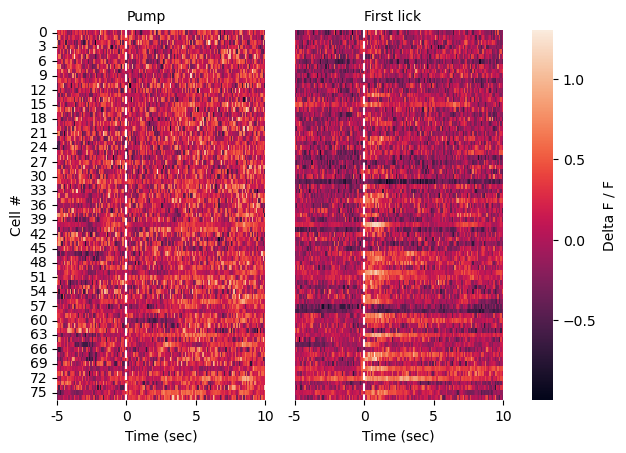

In [3]:
# heatplot to show pump and lick 

f, ax = plt.subplots(ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})

y1 = np.mean(cas["pump_snips_all"], axis=1)
y2 = np.mean(cas["lick_snips_all"], axis=1)

sns.heatmap(y1, ax = ax[0],cbar=False)
sns.heatmap(y2, ax = ax[1], cbar_ax=ax[2])

ax[0].text(50,-2, "Pump")
ax[0].vlines([50],0,77, color="white", linestyle="--")

ax[1].text(50,-2, "First lick")
ax[1].vlines([50],0,77, color="white", linestyle="--")

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150], ["-5", "0", "5", "10"], rotation=0)
    axis.set_xlabel("Time (sec)")
#     axis.set_xticklabels(["-5", "0", "5", "10"], rotate=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])

ax[2].set_ylabel("Delta F / F")

f.savefig("..//output//vgp302_heatmap_allcells.png")

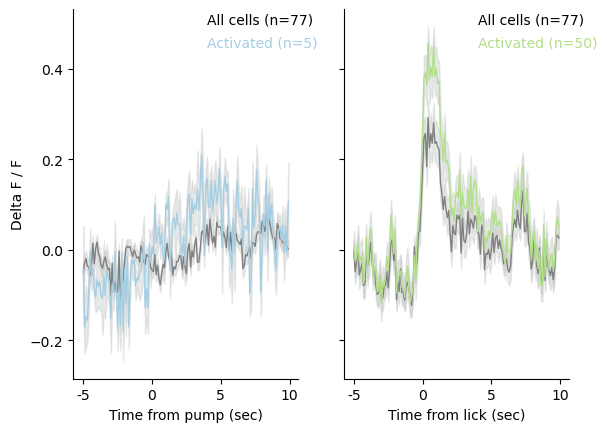

In [5]:
# shaded error plots to show activation

f, ax = plt.subplots(ncols=2, sharey=True)

y1 = np.mean(cas["pump_snips_all"], axis=1)
y1_resp = np.mean(cas["pump_snips_all"][np.where(cas["pump_responsive"] == 1)], axis=1)

ax[0].text(90, 0.5, "All cells (n=77)")
ax[0].text(90, 0.45, "Activated (n=5)", color="#a6cee3")

tp.shadedError(ax[0], y1, linecolor="grey")
tp.shadedError(ax[0], y1_resp, linecolor="#a6cee3")

y2 = np.mean(cas["lick_snips_all"], axis=1)
y2_resp = np.mean(cas["lick_snips_all"][np.where(cas["lick_responsive"] == 1)], axis=1)

tp.shadedError(ax[1], y2, linecolor="grey")
tp.shadedError(ax[1], y2_resp, linecolor="#b2df8a")

ax[1].text(90, 0.5, "All cells (n=77)")
ax[1].text(90, 0.45, "Activated (n=50)", color="#b2df8a")

for axis in ax:
    axis.set_xticks([0,50,100,150], ["-5", "0", "5", "10"], rotation=0)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    
ax[0].set_xlabel("Time from pump (sec)")
ax[1].set_xlabel("Time from lick (sec)")

ax[0].set_ylabel("Delta F / F")
ax[0].set_yticks([-0.2, 0, 0.2, 0.4])

f.savefig("..//output//vgp302_shadederror.png")

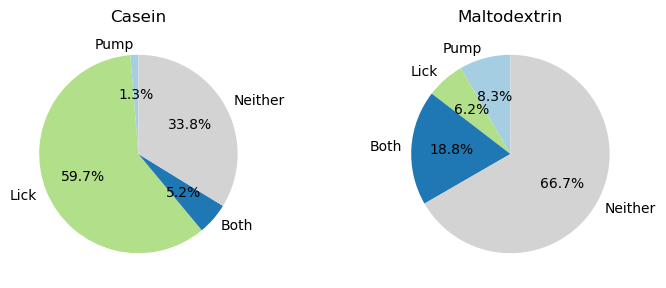

In [13]:
# make pie chart showing activated cells

pie_colors = ['#a6cee3','#b2df8a','#1f78b4','lightgrey']
labels = ['Pump','Lick','Both','Neither']

f, [ax1, ax2] = plt.subplots(figsize=(8,4), ncols=2, gridspec_kw={"wspace":0.5})

ax1.pie(cas["df_responsive"].activated, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors)

ax2.pie(malt["df_responsive"].activated, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors)

ax1.set_title("Casein")
ax2.set_title("Maltodextrin")

f.savefig("..//output//vgp302_pies_activated.png")

In [67]:
np.shape(cas["pump_snips_all"])
np.shape(cas["lick_snips_all"][np.where(cas["lick_responsive"] == 1)])

(50, 16, 150)

In [111]:
s = assemble_data(s2p_folder,events_file)

In [112]:
get_number_cells

<function __main__.get_number_cells(s2p_folder)>

In [113]:
s = assemble_data(s2p_folder,events_file)
np.shape(s)

()

In [114]:
s.keys()

dict_keys(['name', 'group', 'raw_F', 'neu_F', 'iscell', 'pump_snips_all', 'pump_responsive', 'lick_snips_all', 'lick_responsive'])

In [115]:
np.shape(s["lick_snips_all"])

(48, 12, 150)

In [116]:
l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]
l.shape

(12, 12, 150)

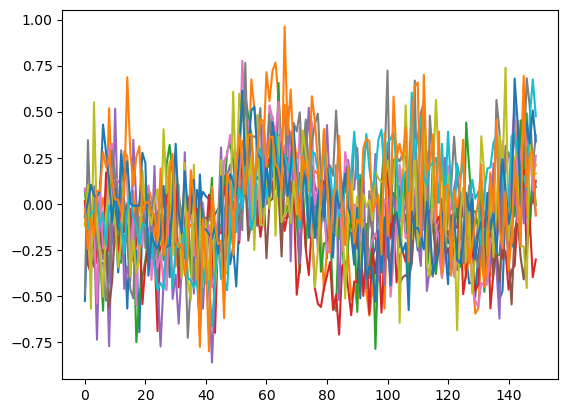

In [117]:
plt.plot(np.mean(l, axis=1).T);

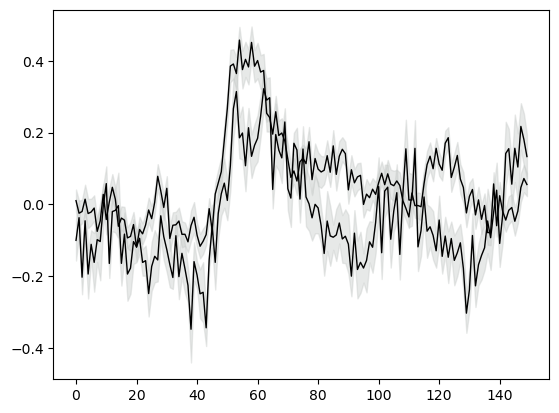

In [121]:
import trompy as tp

f, ax = plt.subplots()

for sol in [cas, malt]:
    s = sol
    l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
    p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]

    y = np.mean(l, axis=1)

    tp.shadedError(ax, y)

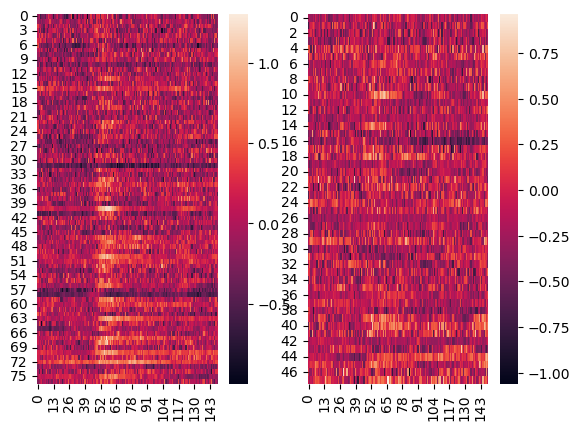

In [130]:
import seaborn as sns

f, ax = plt.subplots(ncols=2)

for sol, axis in zip([cas, malt], ax):
    y = np.mean(sol["lick_snips_all"], axis=1)
    sns.heatmap(y, ax = axis)

In [ ]:
# pie chart for activated cells 
sizes_a = [n_pump_a_only, n_lick_a_only, n_both_a, n_non_a]
sizes_i = [n_pump_i_only, n_lick_i_only, n_both_i, n_non_i]
sizes_r = [n_pump_r, n_lick_r, n_both_r, n_non_r]
labels = 'Pump','Lick','Both','Neither'

f1, ax1 = plt.subplots()
ax1.pie(sizes_a, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=['green','red','yellow','dimgrey'])

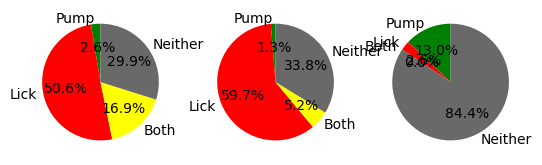

In [13]:
def get_ncells_overlap(cond1, cond2):
    
    n_both = sum(np.logical_and(cond1, cond2))
    n_neither = sum(~np.logical_or(cond1, cond2))
    n_cond1 = int(sum(cond1) - n_both)
    n_cond2 = int(sum(cond2) - n_both)

    return (n_cond1, n_cond2, n_both, n_neither)

s = cas

# responsive cells
pump_r = abs(s["pump_responsive"])
lick_r = abs(s["lick_responsive"])

# activated cells
pump_a = s["pump_responsive"] == 1
lick_a = s["lick_responsive"] == 1

# inhibited cells
pump_i = s["pump_responsive"] == -1
lick_i = s["lick_responsive"] == -1

import pandas as pd
return pd.DataFrame([get_ncells_overlap(pump_r, lick_r),
                   get_ncells_overlap(pump_a, lick_a),
                   get_ncells_overlap(pump_i, lick_i)],
                  columns=["pump", "lick", "both", "neither"],
                  index=["responsive", "activated", "inhibited"]).T

pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'


f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)

ax1.pie(get_ncells_overlap(pump_r, lick_r), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax2.pie(get_ncells_overlap(pump_a, lick_a), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax3.pie(get_ncells_overlap(pump_i, lick_i), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);



In [14]:
df

,responsive,activated,inhibited
pump,2,1,10
lick,39,46,2
both,13,4,0
neither,23,26,65


0 [2, 3]
1 [41, 8]
2 [54, 18]
3 [77, 48]


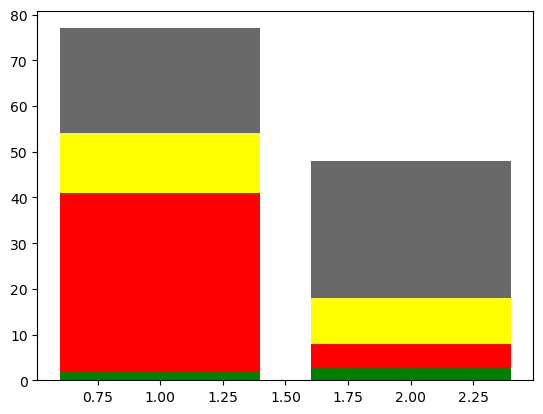

In [148]:
f, ax = plt.subplots()

pie_colors = ['green','red','yellow','dimgrey']

pump_r = abs(cas["pump_responsive"])
lick_r = abs(cas["lick_responsive"])
cas_bars = get_ncells_overlap(pump_r, lick_r)

pump_r = abs(malt["pump_responsive"])
lick_r = abs(malt["lick_responsive"])
malt_bars = get_ncells_overlap(pump_r, lick_r)

bottom=[0, 0]
for i, bars_c, bars_m in zip(range(4), cas_bars, malt_bars):
    ax.bar(1, bars_c, bottom=bottom[0], color=pie_colors[i])
    ax.bar(2, bars_m, bottom=bottom[1], color=pie_colors[i])
    
    bottom[0] += bars_c
    bottom[1] += bars_m
    
    print(i, bottom)
    

In [102]:
pump_a = s["pump_responsive"] == 1
pump_a

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True])

In [103]:
np.logical_or(c3, c4)
~np.logical_or(c1, c2)

array([ True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False])

In [104]:
n_non_r + n_both_r + n_lickonly_r + n_pumponly_r

77

In [105]:
int(sum(abs(s["lick_responsive"]) * abs(s["pump_responsive"])))


13

In [106]:
pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'

sizes_r = [n_pump_r, n_lick_r, n_both_r, n_neither_r]
sizes_a = [n_pump_a, n_lick_a, n_both_a, n_neither_a]
sizes_i = [n_pump_i, n_lick_i, n_both_i, n_neither_i]

f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)
ax1.pie(sizes_r, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);


NameError: name 'n_both_i' is not defined

In [222]:
np.count_nonzero(s["lick_responsive"] == 1)

50

In [17]:
cas = assemble_data(s2p_folder,events_file)
malt = assemble_data(s2p_folder,events_file)

In [ ]:
METAFILE = "..\\data\\"